## Лабораторная работа №2 по курсу "Обработка и Распознавание Изображений"
## Иванов Сергей, гр. 317

### Инструкция по запуску.
Для получения номера класса вызовается функцию solve (см. ниже), с единственным аргументом в виде названия файла.

In [1]:
import cv2
import numpy as np
from random import randint
import math

from skimage import img_as_float
from skimage import img_as_ubyte
from skimage.morphology import skeletonize

In [2]:
def skelet(img):
    image = img_as_float(img)
    skeleton = skeletonize(image)
    return img_as_ubyte(skeleton)

In [3]:
def show(img):
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
def load(name):
    img = cv2.imread(name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)[1]

In [5]:
def getFeatures(img):
    skel = skelet(img)

    im2, contours, hierarchy = cv2.findContours(skelet(img), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)        
    cnvx_ans = np.array([len(cv2.convexHull(cnt)) for cnt in contours]).max()
      
    def walk(x, y, ans):        
        if skel[x][y] == 0:
            return 0
               
        skel[x][y] = 0
        
        ways = []
        ways.append(walk(x - 1, y, ans))
        ways.append(walk(x + 1, y, ans))
        ways.append(walk(x, y - 1, ans))
        ways.append(walk(x, y + 1, ans))
        ways.append(walk(x + 1, y + 1, ans))
        ways.append(walk(x + 1, y - 1, ans))
        ways.append(walk(x - 1, y - 1, ans))
        ways.append(walk(x - 1, y + 1, ans))
        ways = np.array(ways)
        
        if (ways > 30).sum() > 1:            
            ans.append((x, y))
        
        return ways.max() + 1
    
    ans = []
    walk(int(np.nonzero(skel)[0][0]), int(np.nonzero(skel)[1][0]), ans)
                
    return cnvx_ans, len(ans)

In [6]:
def solve(name):
    img = load(name)    
    cnvx_f, skel_f = getFeatures(img)

    if skel_f <= 3:
        return 5
    if skel_f == 4:
        if cnvx_f <= 16:
            return 2
        if cnvx_f <= 25:
            return 5
        return 6
    if skel_f >= 5 and skel_f <= 6:
        if cnvx_f <= 21:
            return 2
        return 6
    if skel_f == 7:
        if cnvx_f <= 12:
            return 3
        if cnvx_f <= 21:
            return 2
        return 6
    if skel_f == 8:
        if cnvx_f <= 13:
            return 3
        if cnvx_f <= 21:
            return 4
        return 6
    if skel_f == 9:
        if cnvx_f <= 9:
            return 3
        if cnvx_f <= 21:
            return 4
        return 6
    if skel_f == 10:
        if cnvx_f <= 6:
            return 1
        if cnvx_f <= 9:
            return 3
        if cnvx_f <= 21:
            return 4
        return 6
    if skel_f >= 11:
        if cnvx_f <= 8:
            return 1
        if cnvx_f <= 21:
            return 7
        return 6

Здесь поставьте название файла; на выходе выдаётся итоговый ответ

In [7]:
solve("S4 (1).bmp")

4

# ТЕСТОВЫЙ МОДУЛЬ
Этот модуль не требуется для работы программы; в нём ведётся запуск алгоритма на тестовых изображениях из предоставленной входной выборки, а также анализ полученной информации, использующийся для обоснования алгоритма. Файлы здесь имеют названния вида "Si (j).bmp", где i - истинный класс, j - порядковый номер. Впрочем, полагаю, что запуск этого модуля не потребуется, достаточно просто посмотреть на результат его работы.

In [8]:
import pandas as pd
from itertools import product

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 12

In [9]:
def solve(cnvx_f, skel_f):
    if skel_f <= 3:
        return 5
    if skel_f == 4:
        if cnvx_f <= 16:
            return 2
        if cnvx_f <= 25:
            return 5
        return 6
    if skel_f >= 5 and skel_f <= 6:
        if cnvx_f <= 21:
            return 2
        return 6
    if skel_f == 7:
        if cnvx_f <= 12:
            return 3
        if cnvx_f <= 21:
            return 2
        return 6
    if skel_f == 8:
        if cnvx_f <= 13:
            return 3
        if cnvx_f <= 21:
            return 4
        return 6
    if skel_f == 9:
        if cnvx_f <= 9:
            return 3
        if cnvx_f <= 21:
            return 4
        return 6
    if skel_f == 10:
        if cnvx_f <= 6:
            return 1
        if cnvx_f <= 9:
            return 3
        if cnvx_f <= 21:
            return 4
        return 6
    if skel_f >= 11:
        if cnvx_f <= 8:
            return 1
        if cnvx_f <= 21:
            return 7
        return 6

In [10]:
starts = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']
colors = {'S1': '#000000', 'S2': 'y', 'S3': 'r', 'S4': 'c', 'S5': 'm', 'S6': 'g', 'S7': 'b'}
ends = [' (1)', ' (2)', ' (3)', ' (4)']

element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

In [11]:
DF = pd.DataFrame()
F = pd.DataFrame()
F2 = pd.DataFrame()
for start, end in list(product(starts, ends)):
    img = load(start + end + '.bmp')
    
    f1, f2 = getFeatures(img)
    DF.ix[start + end, "cnvx"] = f1
    DF.ix[start + end, "bases"] = f2
    F.ix[start, end] = f1
    F2.ix[start, end] = f2

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


## Значения первого признака

In [12]:
F

,(1),(2),(3),(4)
S1,5.0,6.0,7.0,5.0
S2,14.0,15.0,16.0,14.0
S3,9.0,9.0,8.0,11.0
S4,14.0,10.0,12.0,15.0
S5,21.0,20.0,18.0,23.0
S6,30.0,28.0,29.0,27.0
S7,9.0,11.0,12.0,11.0


## Значения второго признака

In [13]:
F2

,(1),(2),(3),(4)
S1,12.0,12.0,12.0,11.0
S2,5.0,6.0,5.0,5.0
S3,9.0,8.0,9.0,8.0
S4,9.0,9.0,10.0,9.0
S5,1.0,2.0,3.0,2.0
S6,5.0,6.0,7.0,6.0
S7,12.0,11.0,11.0,12.0


## Расположение признаков на плоскости

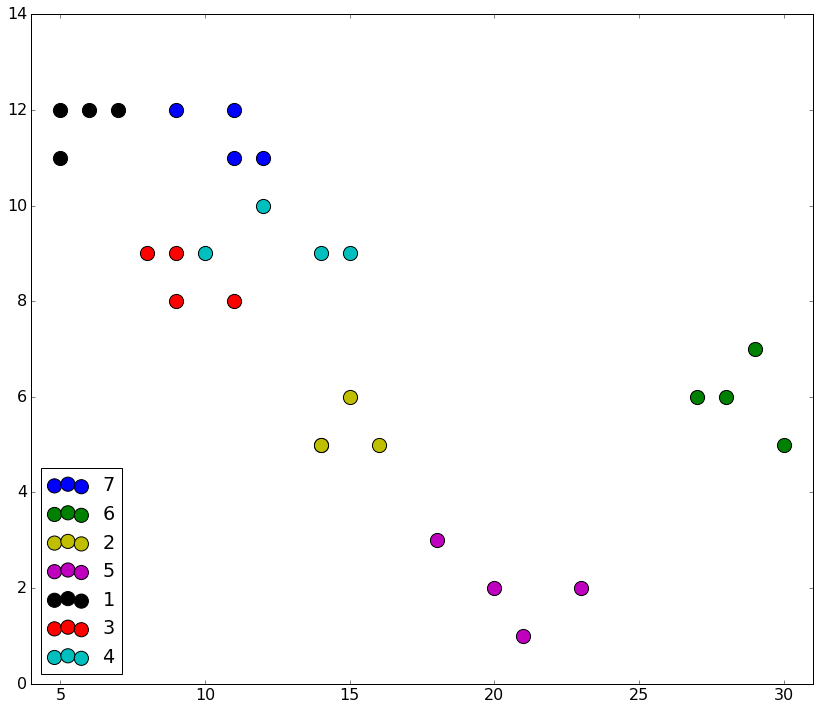

In [14]:
import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)

data = DF.as_matrix()
for name, col in colors.items():
    i = int(name[1])
    plt.scatter(data[i * 4 - 4: i*4, 0], data[i * 4 - 4: i*4, 1], s=200, c = col, label=name[1])

plt.xlim(4, 31)
#plt.ylim(0, 13)
plt.legend(loc=3)

## Разбиение пространства признаков решающим деревом из sklearn

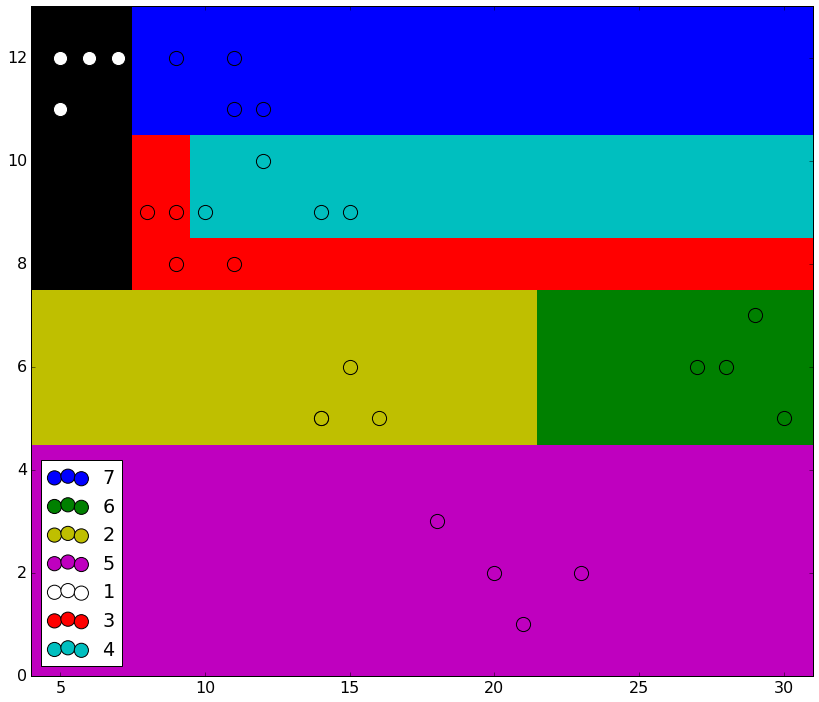

In [15]:
from sklearn.tree import DecisionTreeClassifier as DTC
from matplotlib.colors import LinearSegmentedColormap
dtc = DTC().fit(data, np.array([1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7]))

xx, yy = np.meshgrid(np.arange(4, 33), np.arange(0, 15))
cl = dtc.predict(np.array([xx.flatten(), yy.flatten()]).T)

cm = LinearSegmentedColormap.from_list("", ['#000000', 'y', 'r', 'c', 'm', 'g', 'b'], 7)
plt.pcolor(xx - 0.5, yy - 0.5, cl.reshape(xx.shape), cmap=cm)

for name, col in colors.items():
    i = int(name[1])
    if col == '#000000':
        col = '#FFFFFF'
    plt.scatter(data[i * 4 - 4: i*4, 0], data[i * 4 - 4: i*4, 1], s=200, c = col, label=name[1])

plt.xlim(4, 31)
plt.ylim(0, 13)
plt.legend(loc=3)

## Собственное разбиение

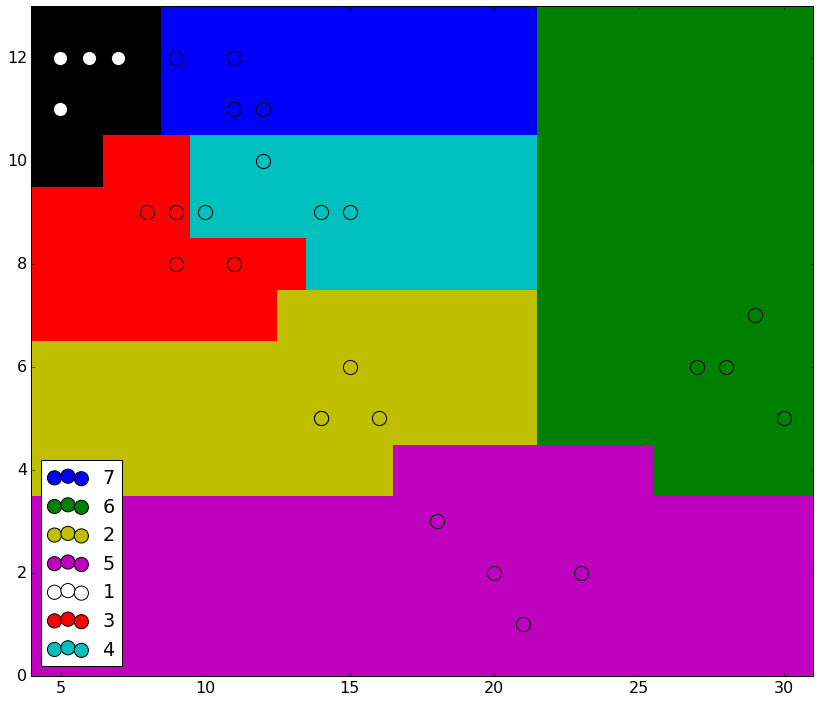

In [16]:
from matplotlib.colors import LinearSegmentedColormap

xx, yy = np.meshgrid(np.arange(4, 33), np.arange(0, 15))
cl = []
for a in np.array([xx.flatten(), yy.flatten()]).T:
    cl.append(solve(a[0], a[1]))
cl = np.array(cl)

cm = LinearSegmentedColormap.from_list("", ['#000000', 'y', 'r', 'c', 'm', 'g', 'b'], 7)
plt.pcolor(xx - 0.5, yy - 0.5, cl.reshape(xx.shape), cmap=cm)

for name, col in colors.items():
    i = int(name[1])    
    if col == '#000000':
        col = '#FFFFFF'
    plt.scatter(data[i * 4 - 4: i*4, 0], data[i * 4 - 4: i*4, 1], s=200, c = col, label=name[1])

plt.xlim(4, 31)
plt.ylim(0, 13)
plt.legend(loc=3)